# Caderno de EDA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df_raw = pd.read_csv("dados/application_train.csv")

In [4]:
# Categorical Features
cat_features = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'ORGANIZATION_TYPE',
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE',
    'FLAG_MOBIL',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'REG_REGION_NOT_LIVE_REGION',
    'FLAG_DOCUMENT_2',
    'FLAG_EMP_PHONE',
    'LIVE_CITY_NOT_WORK_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'REG_CITY_NOT_LIVE_CITY',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'FLAG_DOCUMENT_3',
    'FLAG_EMAIL',
    'FLAG_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_WORK_PHONE',
    'REGION_RATING_CLIENT_W_CITY',
    'REGION_RATING_CLIENT'
]

In [5]:
df_raw.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,246008.000000,246008.000000,246008.000000,2.460080e+05,2.460080e+05,245998.000000,2.457820e+05,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,83649.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246007.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,107205.000000,2.454640e+05,197280.000000,121053.000000,101918.000000,125912.000000,82328.000000,74030.000000,114800.000000,122064.000000,123525.000000,79009.000000,99921.000000,77730.000000,122391.000000,75094.000000,110148.000000,121053.000000,101918.000000,125912.000000,82328.000000,74030.000000,114800.000000,122064.000000,123525.000000,79009.000000,99921.00000,77730.000000,122391.000000,75094.000000,110148.000000,121053.000000,101918.000000,125912.000000,82328.000000,74030.000000,114800.000000,122064.000000,123525.000000,79009.000000,99921.000000,77730.000000,122391.000000,75094.000000,110148.000000,127171.000000,245195.000000,245195.000000,245195.000000,245195.000000,246007.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,212836.000000,212836.000000,212836.000000,212836.000000,212836.000000,212836.000000
mean,278280.072908,0.081176,0.415527,1.689122e+05,5.996283e+05,27129.162648,5.389289e+05,0.020882,-16042.794393,63963.755699,-4988.033300,-2991.647642,12.034346,0.999996,0.819481,0.199095,0.998138,0.281023,0.056722,2.150760,2.052092,2.031206,12.064518,0.015186,0.050616,0.040499,0.078254,0.230541,0.179592,0.502277,5.143916e-01,0.510838,0.117426,0.088385,0.977715,0.752387,0.044643,0.078917,0.149693,0.226097,0.231765,0.066152,0.100702,0.107329,0.008674,0.028299,0.114261,0.087517,0.977066,0.759530,0.042587,0.074466,0.145183,0.222161,0.227929,0.06477,0.105589,0.105934,0.007917,0.026986,0.117851,0.087902,0.977722,0

In [6]:
def filter_features(df: pd.DataFrame, threshold=0.5) -> pd.DataFrame:
    """ Filters the dataframe by the threshold of missing values

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe to be filtered
    threshold : float
        The threshold to filter the dataframe

    Returns
    -------
    pd.DataFrame
        The filtered dataframe
    """
    df_copy = df.copy()
    df_copy = df_copy.isna().sum()/len(df_copy)
    df_copy = df_copy > threshold
    features_to_drop = df_copy[df_copy].index.to_list()
    return df.drop(columns=features_to_drop)

## Análise das variáveis numéricas

In [7]:
# Getting numerical features
df_num = df_raw.drop(columns=cat_features)

# Dropando SK_ID_CURR
df_num.drop("SK_ID_CURR", inplace=True, axis=1)

df_num.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,112500.0,700830.0,22738.5,585000.0,0.019689,-8676,-813,-4163.0,-1363,NaN,1.0,17,NaN,0.699373,0.171468,0.0619,0.0302,0.9762,0.6736,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0504,0.0507,0.0,0.0,0.0630,0.0313,0.9762,0.6864,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0551,0.0528,0.0,0.0,0.0625,0.0302,0.9762,0.6780,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0513,0.0516,0.0,0.0,0.0399,0.0,0.0,0.0,0.0,-589.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,90000.0,375322.5,14422.5,324000.0,0.025164,-13583,-223,-3554.0,-3287,NaN,2.0,11,0.541385,0.199651,0.768808,0.0227,0.0566,0.9806,0.7348,0.0161,0.0,0.1034,0.0417,0.0833,0.0133,0.0185,0.0184,0.0,0.0,0.0231,0.0587,0.9806,0.7452,0.0162,0.0,0.1034,0.0417,0.0833,0.0136,0.0202,0.0192,0.0,0.0,0.0229,0.0566,0.9806,0.7383,0.0162,0.0,0.1034,0.0417,0.0833,0.0135,0.0188,0.0187,0.0,0.0,0.0158,0.0,0.0,0.0,0.0,-1409.0,0.0,0.0,0.0,1.0,0.0,3.0
2,0,0,180000.0,544491.0,16047.0,454500.0,0.035792,-13993,-6202,-7971.0,-4175,9.0,2.0,15,NaN,0.704880,0.626304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,-675.0,0.0,0.0,0.0,1.0,1.0,3.0
3,0,0,270000.0,814041.0,28971.0,679500.0,0.046220,-22425,365243,-11805.0,-1732,NaN,2.0,9,NaN,0.724576,0.810618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0121,2.0,0.0,2.0,0.0,-1588.0,0.0,0.0,0.0,0.0,1.0,4.0
4,0,0,144000.0,675000.0,21906.0,675000.0,0.026392,-18839,-2763,-5069.0,-2381,NaN,1.0,16,0.592466,0.706310,0.331251,0.1907,0.1802,0.9891,0.8504,0.0344,0.0,0.4483,0.1667,0.2083,0.2751,0.1555,0.2060,0.0,0.0,0.1943,0.1870,0.9891,0.8563,0.0348,0.0,0.4483,0.1667,0.2083,0.2814,0.1699,0.2146,0.0,0.0,0.1926,0.1802,0.9891,0.8524,0.0347,0.0,0.4483,0.1667,0.2083,0.2799,0.1582,0.2097,0.0,0.0,0.1620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0


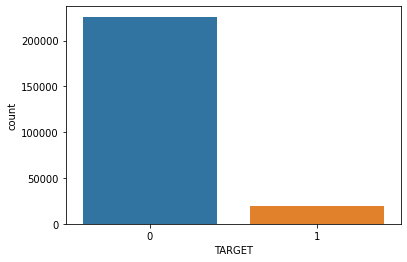

In [8]:
# Plotting the distribution of the target, we can see that the dataset is imbalanced
sns.countplot(x=df_raw["TARGET"])
plt.show()

In [9]:
# Removing features with more than 50% of missing values
df_num_fil = filter_features(df_num, 0.5)

# Filling NaN values with the median
df_num_fil = df_num_fil.fillna(df_num_fil.median())
df_num_fil.isna().sum()

TARGET                          0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
CNT_FAM_MEMBERS                 0
HOUR_APPR_PROCESS_START         0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
YEARS_BEGINEXPLUATATION_AVG     0
FLOORSMAX_AVG                   0
YEARS_BEGINEXPLUATATION_MODE    0
FLOORSMAX_MODE                  0
YEARS_BEGINEXPLUATATION_MEDI    0
FLOORSMAX_MEDI                  0
TOTALAREA_MODE                  0
OBS_30_CNT_SOCIAL_CIRCLE        0
DEF_30_CNT_SOCIAL_CIRCLE        0
OBS_60_CNT_SOCIAL_CIRCLE        0
DEF_60_CNT_SOCIAL_CIRCLE        0
DAYS_LAST_PHONE_CHANGE          0
AMT_REQ_CREDIT_BUREAU_HOUR      0
AMT_REQ_CREDIT_BUREAU_DAY       0
AMT_REQ_CREDIT

In [10]:
df_num_fil.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,246008.000000,246008.000000,2.460080e+05,2.460080e+05,246008.000000,2.460080e+05,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,2.460080e+05,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000,246008.000000
mean,0.081176,0.415527,1.689122e+05,5.996283e+05,27129.073254,5.388472e+05,0.020882,-16042.794393,63963.755699,-4988.033300,-2991.647642,2.150759,12.064518,5.145051e-01,0.515679,0.979612,0.196524,0.979280,0.194548,0.979615,0.196325,0.086230,1.418893,0.143569,1.402154,0.100359,-962.704554,0.005443,0.006008,0.029836,0.231346,0.228497,1.778678
std,0.273106,0.719922,2.603818e+05,4.030672e+05,14504.677198,3.698137e+05,0.013852,4365.973763,141400.318322,3520.987048,1510.020637,0.909165,3.264923,1.906952e-01,0.174787,0.042544,0.106629,0.046217,0.105475,0.043055,0.106867,0.078971,2.421265,0.448796,2.399784,0.364359,826.829748,0.077451,0.101914,0.190280,0.857481,0.575677,1.764684
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-23738.000000,-7197.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16564.500000,2.385000e+05,0.010006,-19691.000000,-2758.000000,-7481.000000,-4297.250000,2.000000,10.000000,3.931720e-01,0.415347,0.981600,0.166700,0.981100,0.166700,0.981600,0.166700,0.067100,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.485000e+05,5.147775e+05,24930.000000,4.500000e+05,0.018850,-15763.000000,-1215.000000,-4503.000000,-3250.000000,2.000000,12.000000,5.657089e-01,0.535276,0.981600,0.166700,0.981600,0.166700,0.981600,0.166700,0.068800,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12418.000000,-289.000000,-2018.000000,-1715.000000,3.000000,14.000000,6.632716e-01,0.636376,0.982100,0.166700,0.981600,0.166700,0.982100,0.166700,0.070400,2.000000,0.000000,2.000000,0.000000,-273.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,23.000000,8.549997e-01,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,19.000000,23.000000


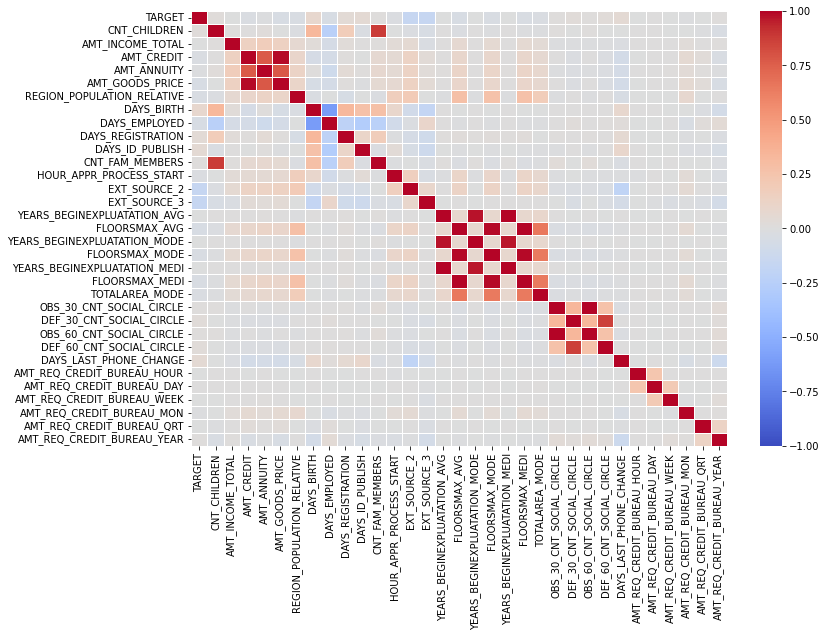

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_num_fil.corr(),
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cmap="coolwarm",
)
plt.show()

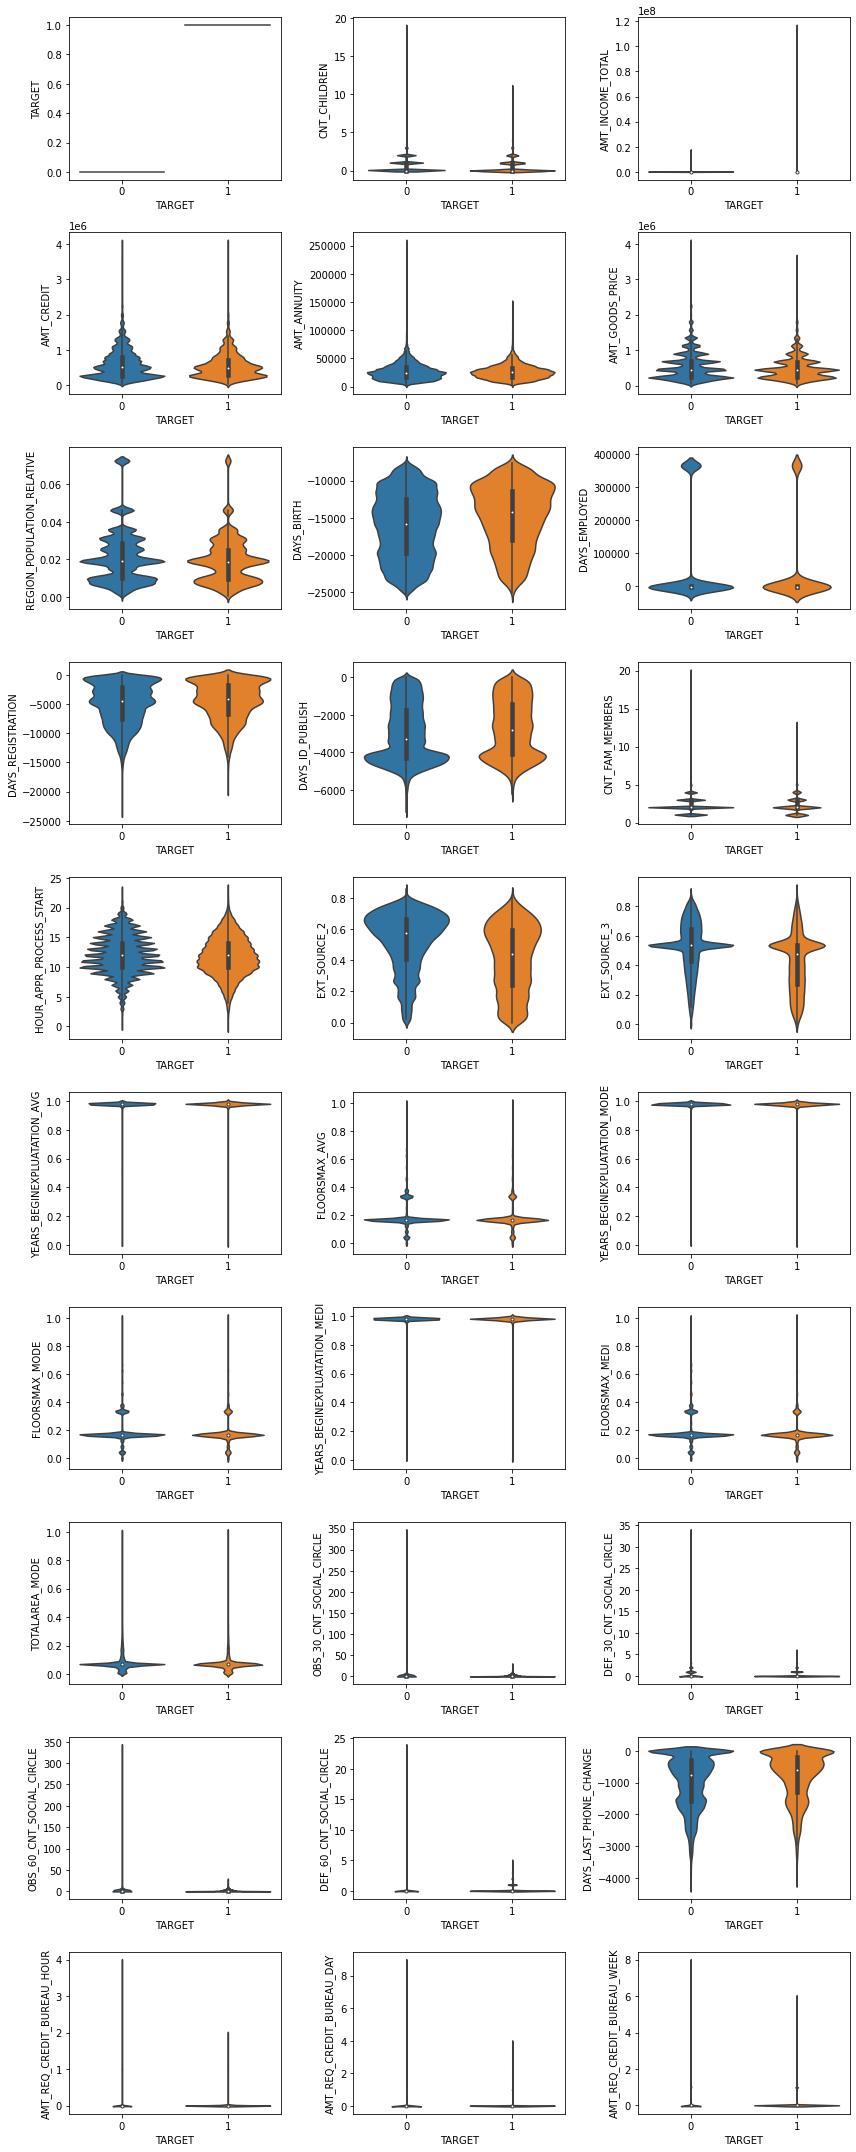

In [12]:
# Violin plot for each feature
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(12, 30)
for ax, feature in zip(axs.flatten(), df_num_fil.columns):
    sns.violinplot(x="TARGET", y=feature, data=df_num_fil, ax=ax)
plt.tight_layout()
plt.show()

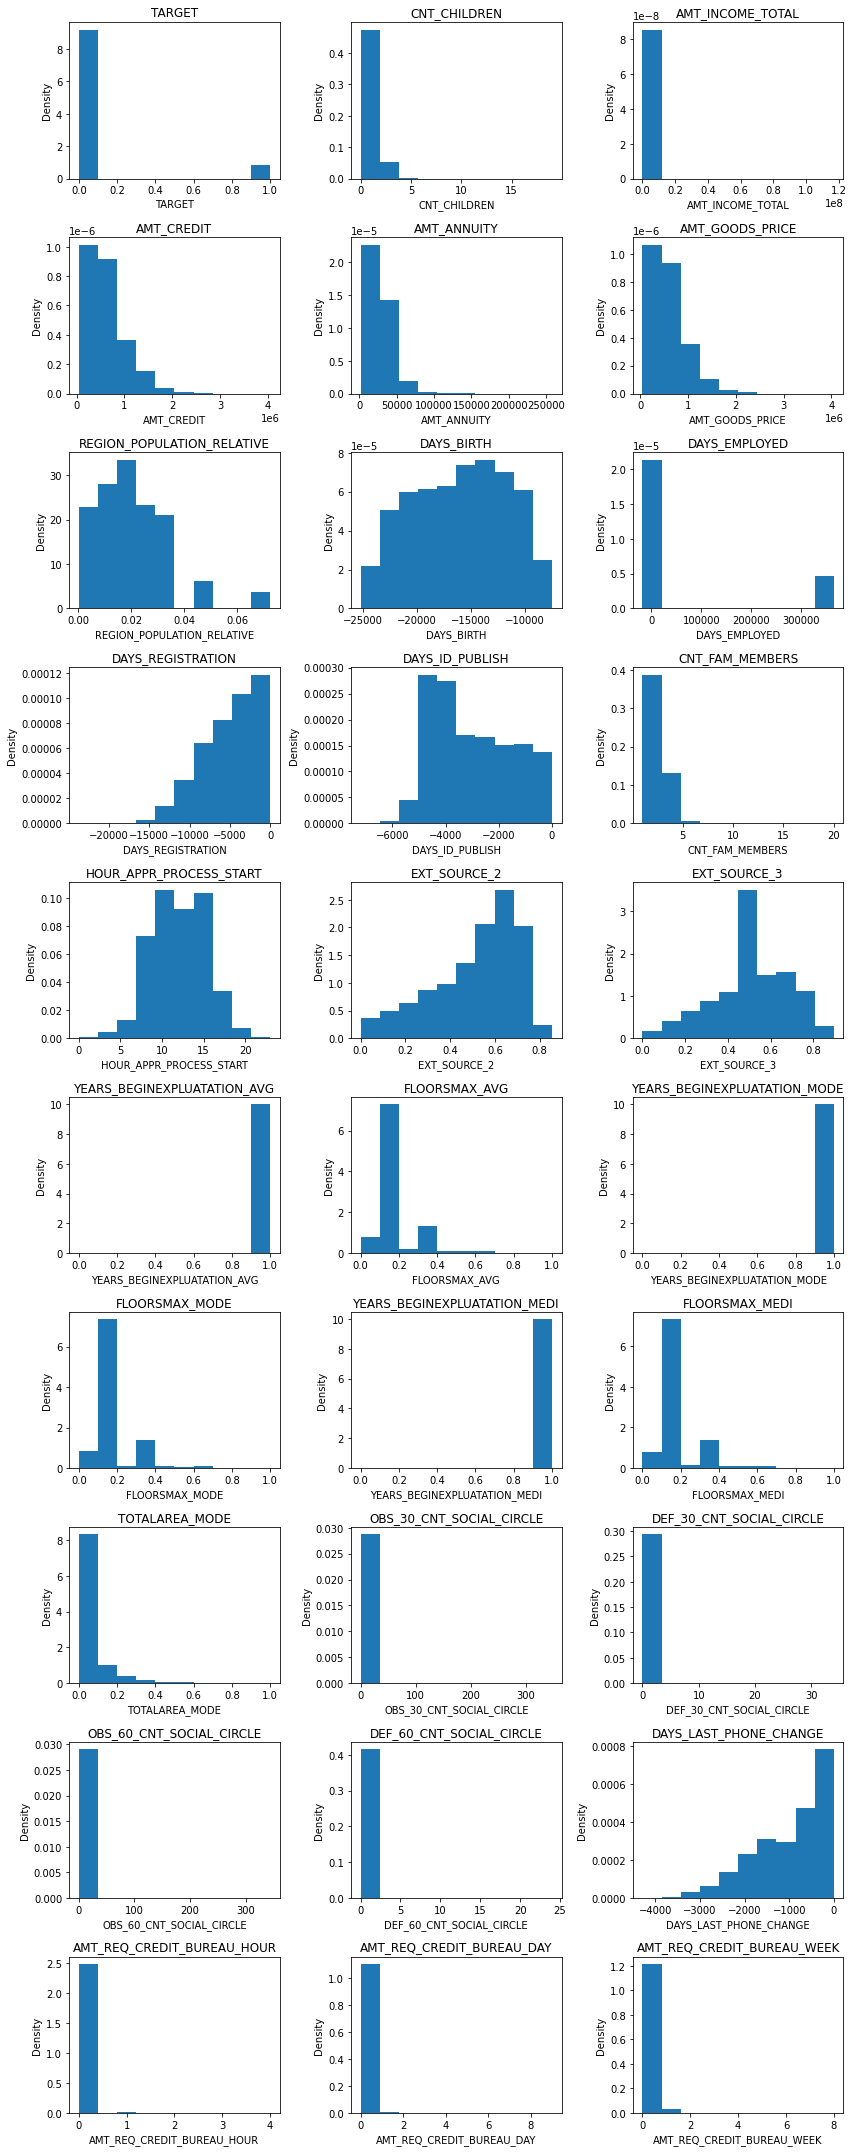

In [13]:
# Plotting the distribution of the features
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(12, 30)
for ax, feature in zip(axs.flatten(), df_num_fil.columns):
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.title.set_text(feature)
    ax.hist(df_num_fil[feature], density=True)
plt.tight_layout()
plt.show()

In [14]:
# Scaling the data
scaler = StandardScaler()
df_num_padrao = scaler.fit_transform(df_num_fil)
df_num_padrao = pd.DataFrame(df_num_padrao, columns=df_num_fil.columns)

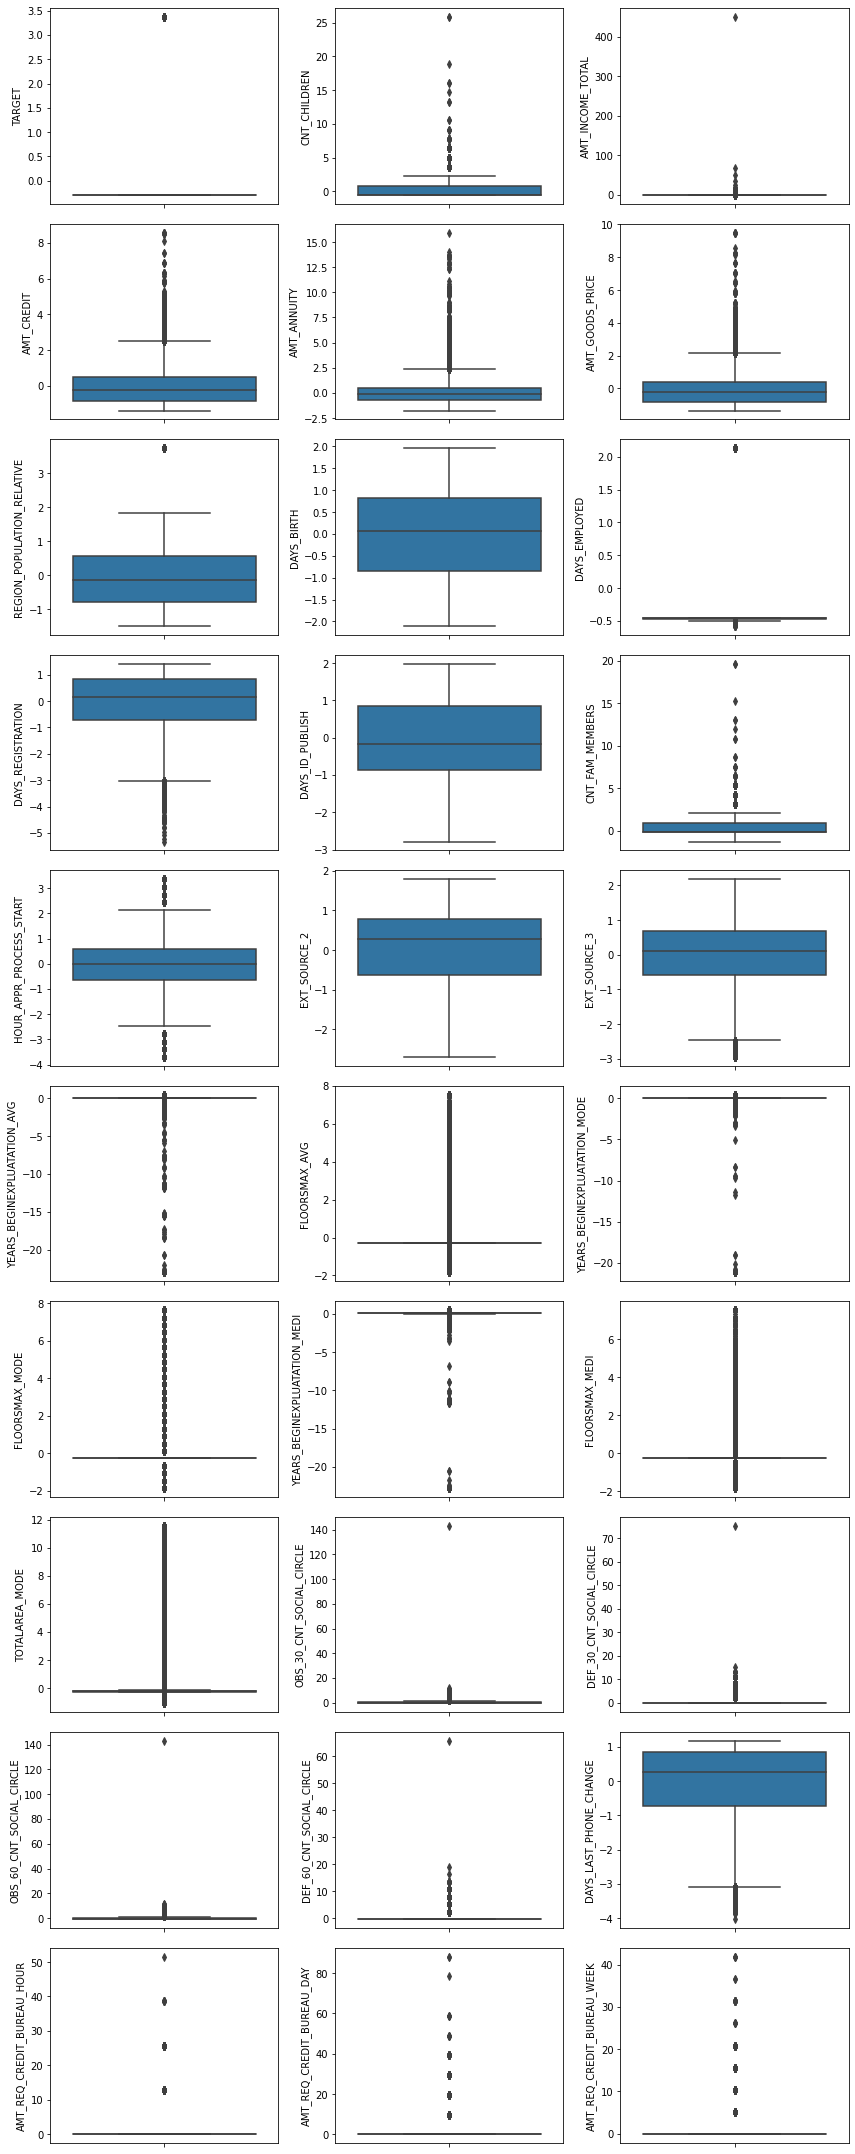

In [15]:
# Boxplot for each feature
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(12, 30)
for ax, feature in zip(axs.flatten(), df_num_padrao.columns):
    sns.boxplot(y=feature, data=df_num_padrao, ax=ax)
plt.tight_layout()
plt.show()

In [16]:
# There are some problems when trying to remove outliers from discrete numerical features
def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
    """ Removes the outliers from the dataframe using the IQR method

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe to be filtered

    Returns
    -------
    pd.DataFrame
        The filtered dataframe
    """
    df_copy = df.copy()
    q1 = df_copy.quantile(0.25)
    q3 = df_copy.quantile(0.75)
    iqr = q3 - q1
    df_copy = df_copy[~((df_copy < (q1 - 1.5 * iqr)) | (df_copy > (q3 + 1.5 * iqr))).any(axis=1)]
    return df_copy

## Análise das variáveis categóricas

In [18]:
df_cat = df_raw[cat_features]
df_cat.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_MOBIL,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_6,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,REG_REGION_NOT_LIVE_REGION,FLAG_DOCUMENT_2,FLAG_EMP_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_3,FLAG_EMAIL,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT
0,Cash loans,F,N,N,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,Core staff,FRIDAY,Trade: type 2,reg oper account,block of flats,Block,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,2,2
1,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,High skill tech staff,MONDAY,Business Entity Type 3,reg oper account,block of flats,Block,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,2,2
2,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Managers,THURSDAY,Business Entity Type 1,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,2,2
3,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,TUESDAY,XNA,NaN,NaN,NaN,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1
4,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,Laborers,FRIDAY,Transport: type 4,reg oper account,block of flats,Panel,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,2,2


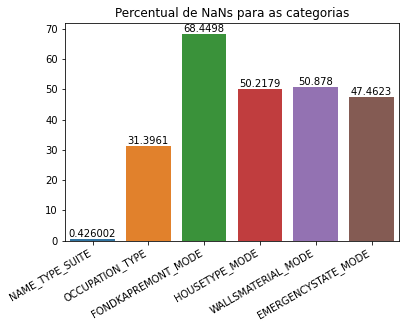

In [22]:
# In the pipeline, we will use the SimpleImputer to fill the missing values
# and the OneHotEncoder to encode the categorical features
series_isna = df_cat.isna().sum()[df_cat.isna().sum()>0]
series_prop = series_isna/df_cat.shape[0]*100
fig, ax = plt.subplots()
sns.barplot(x=series_prop.index, y=series_prop, ax=ax)
ax.bar_label(ax.containers[0])
ax.set_title('Percentual de NaNs para as categorias')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=30, 
    horizontalalignment='right'
)
plt.show()